In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sololab as sololab
from solo_epd_loader import epd_load

# LOAD STIX and RPW Data

In [2]:
stix_folder = "tutorial_data/stix/"
rpw_folder = "tutorial_data/rpw/"

# STIX files

# L1 file (can be spectrogram or pixel file , automatic detection)
# necessary
stx_L1file = "tutorial_data/stix/20220927/solo_L1_stix-sci-xray-spec_20220927T092506-20220927T153001_V01_2209275603-62646.fits"

# BKG file - quiet bkg all bins
# necessary
stx_BKGfile =  "tutorial_data/stix/202209_BKG/solo_L1_stix-sci-xray-cpd_20220911T021423-20220911T030223_V01_2209115148-62679.fits"



#RPW files - from the ROC website or SOAR
# ROC -  https://rpw.lesia.obspm.fr/roc/data/private/solo/rpw/data/L2/calendar.html#dataset=hfr-surv

# TNR file (from ~1kHz to ~990 kHz)
# Optional
tnr_file = "tutorial_data/rpw/202209/solo_L2_rpw-tnr-surv-cdag_20220927_V02.cdf"

# HFR file (from 425 kHz to 16.4 MHz)
# Necessary
hfr_file = "tutorial_data/rpw/202209/solo_L2_rpw-hfr-surv-cdag_20220927_V02.cdf"


# Total time interval - time limits of the STIX and RPW dinamic spectra visualization
# Recommendation - use the  limmits of STIX data file as it is usually the one with a 
# more limited window (RPW files cover the whole day)
# you can see the time limits of stix file in the file name (after '...cpd_')
start_time = "27-Sep-2022 10:00:00"
end_time = "27-Sep-2022 11:19:00"


# bkg interval
# try to define a BKG time interval - time interval without flare related counts
# this time interval can also be used for RPW background, however, you can
# define a second BKG time interval just for RPW data
# IMPORTANT - the BKG intervals must be within the total time interval of the RPW/STIX visualization
start_bkg = "27-Sep-2022 10:00:00"
end_bkg = "27-Sep-2022 10:05:00"


start_bkg_hfr = "27-Sep-2022 11:05:00"
end_bkg_hfr = "27-Sep-2022 11:10:00"



# create ranges
date_range=[start_time,end_time]
bkg_range=[start_bkg,end_bkg]
bkg_range_hfr=[start_bkg_hfr,end_bkg_hfr]

# CREATE DATA OBJECTS

# get STIX counts - remove background
# creates STIX counts object, where BKG counts are subtracted 
# by using the BKG file info and also the BKG time interval
l1_cts = sololab.stix_remove_bkg_counts(stx_L1file,stx_BKGfile,stix_bkg_range=bkg_range)

# RPW DATA

# HFR data
# sensors 9,10,11 are the three HFR sensors of RPW
# this line extracts the CDF files and store the data
hfr_data = sololab.rpw_get_data(hfr_file,sensor=9)

# create the PSD object
# you can set the range of frequencies (in kHz) that are extracted and saved. 
# IMPORTANT: high frequency channels (above 5MHz) have pollution that can reach 
# up to 3 orders of magnitude above the peak values during transient events, thus
# is recommended to limit the frequencies extracted (towards high freqs) as much as possible
# to have good contrast when plotting the spectrograms
hfr_psd = sololab.rpw_create_PSD(hfr_data,date_range=date_range,rpw_bkg_interval=bkg_range_hfr,
                         freq_range=[0,16500])


# TNR data
# this line extracts the CDF files and store the data
tnr_data = sololab.rpw_get_data(tnr_file)

# create the PSD object
# you can set the range of frequencies (in kHz) that are extracted and saved. 
# IMPORTANT: low frequency channels (below 50kHz) have PSD values that can reach 
# up to 3 orders of magnitude above the peak psd values during transient events, thus
# is recommended to limit the frequencies extracted (towards low freqs) as much as possible
# to have good contrast when plotting the spectrograms

# IMPORTANT - "which_freqs"  parameter defines which frequencies are used.
#    if 'non_zero':    it'll extract every frequency that has non-zero entries (recommended for TNR)
#    if Not specified: it'll use a list of suggested freqs (only useful for HFR) 
tnr_psd = sololab.rpw_create_PSD(tnr_data, date_range=date_range,rpw_bkg_interval=bkg_range,which_freqs="non_zero",
                         freq_range=[100,1000])



# Bonus: in TNR spectrograms is common to find langmuir waves (LW) below 100kHz. these are order of magnitude more 
# intense than the signal of most IPT3, therefore affecting the contrast of the colormap if contained in the spectrogram
# the recommended procedure is to consider the IPT3 above 100kHz and extending it below if necessary (e.g. measuring timing of LW)
# in the line below we'll create another RPW psd for the range in which LW are present
lang_psd = sololab.rpw_create_PSD(tnr_data, date_range=date_range,rpw_bkg_interval=bkg_range,which_freqs="non_zero",
                         freq_range=[30,100])



Extracting info: 
  File:  solo_L1_stix-sci-xray-spec_20220927T092506-20220927T153001_V01_2209275603-62646.fits
  Type:  stix spectrogram 
  Obs. elapsed time:  364.9 minutes
  Distance s/c - sun: 0.437 AU
  [!] frame 3 had no energy data, using frame 4 instead.
  Energy channels extracted:  32
  Data info:
   Dt : Max = 84s  Min = 0s  Avg = 1.7s  std = 2.6s  Median:1.0s   Mode: 0s (49.3%)
Extracting info: 
  File:  solo_L1_stix-sci-xray-cpd_20220911T021423-20220911T030223_V01_2209115148-62679.fits
  Type:  STIX L1 BKG
  Obs. elapsed time:  48.0 minutes
  Distance s/c - sun: 0.645 AU
  [!] frame 3 had no energy data, using frame 4 instead.
  Energy channels extracted:  31
  Data info:
   Dt : Max = 84s  Min = 0s  Avg = 1.7s  std = 2.6s  Median:1.0s   Mode: 0s (49.3%)
  [!] STIX Background subtraction: 31 energy channels used
Extracting info:
  File:  solo_L2_rpw-hfr-surv-cdag_20220927_V02.cdf
  Type:  RPW-HFR L2
  sensors:  (463040,) (0,)
  data cropped from  2022-09-27 10:00:00  to  2

In [15]:
x= np.array(hfr_data['frequency'][:,0])
xx = x[x>0]
len(x)

321

In [14]:
np.shape(hfr_data['voltage'])

(321, 11576)

### Bonus: Filter, save and load 


Filtering RPW high values ...
 Inflexion point found at: 10 ** (-13.4)
 Replacing higher values with 10 ** -16.0 ...


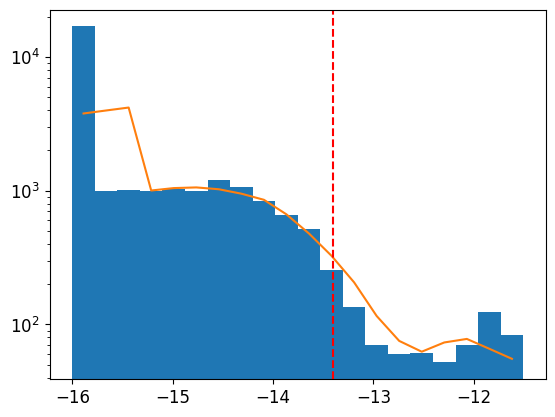

In [26]:
# FILTER
# to avoid the saturation problem for the high frequencies in HFR, I created a routine to 
# crop the high end values of the spectrum so that the contrast is better for the IPT3

# To use it you can set the PSD threshold above which values are cropped. If not specified,
# the routine will find a threshold automatically

hfr_psd = sololab.rpw_filter_high_values(hfr_psd,threshold=10**(-13.4))


# SAVE 
# as you  noticed, loading the RPW/STIX files can be a really slow process. To avoid this, 
# you can save the HFR psd, TNR psd and STIX counts objects so that you can retrieve them
# easily in the future. Just choose a name and a path to save the compressed file.
# If no TNR psd, you can assign the parameter 'tnr_psd=None'
savepath ="data/saved_examples/"


#sololab.save_objects(path=savepath,name='sololab_test_27Sep2022_1035',counts_spec=l1_cts,hfr_psd=hfr_psd,tnr_psd=tnr_psd)

# LOAD
# in order to retrieve the saved objects, load the complete filename
#l1_cts,hfr_psd,tnr_psd = sololab.load_objects(savepath+"sololab_test_06Jan2023_0050.npz")


# RPW/STIX plots

STIX energy bins info:
6 - 12 keV max. cts/sec = 260976  Time: 27-Sep-2022 10:35:08
16 - 28 keV max. cts/sec = 3855  Time: 27-Sep-2022 10:33:54
32 - 84 keV max. cts/sec = 1370  Time: 27-Sep-2022 13:39:00


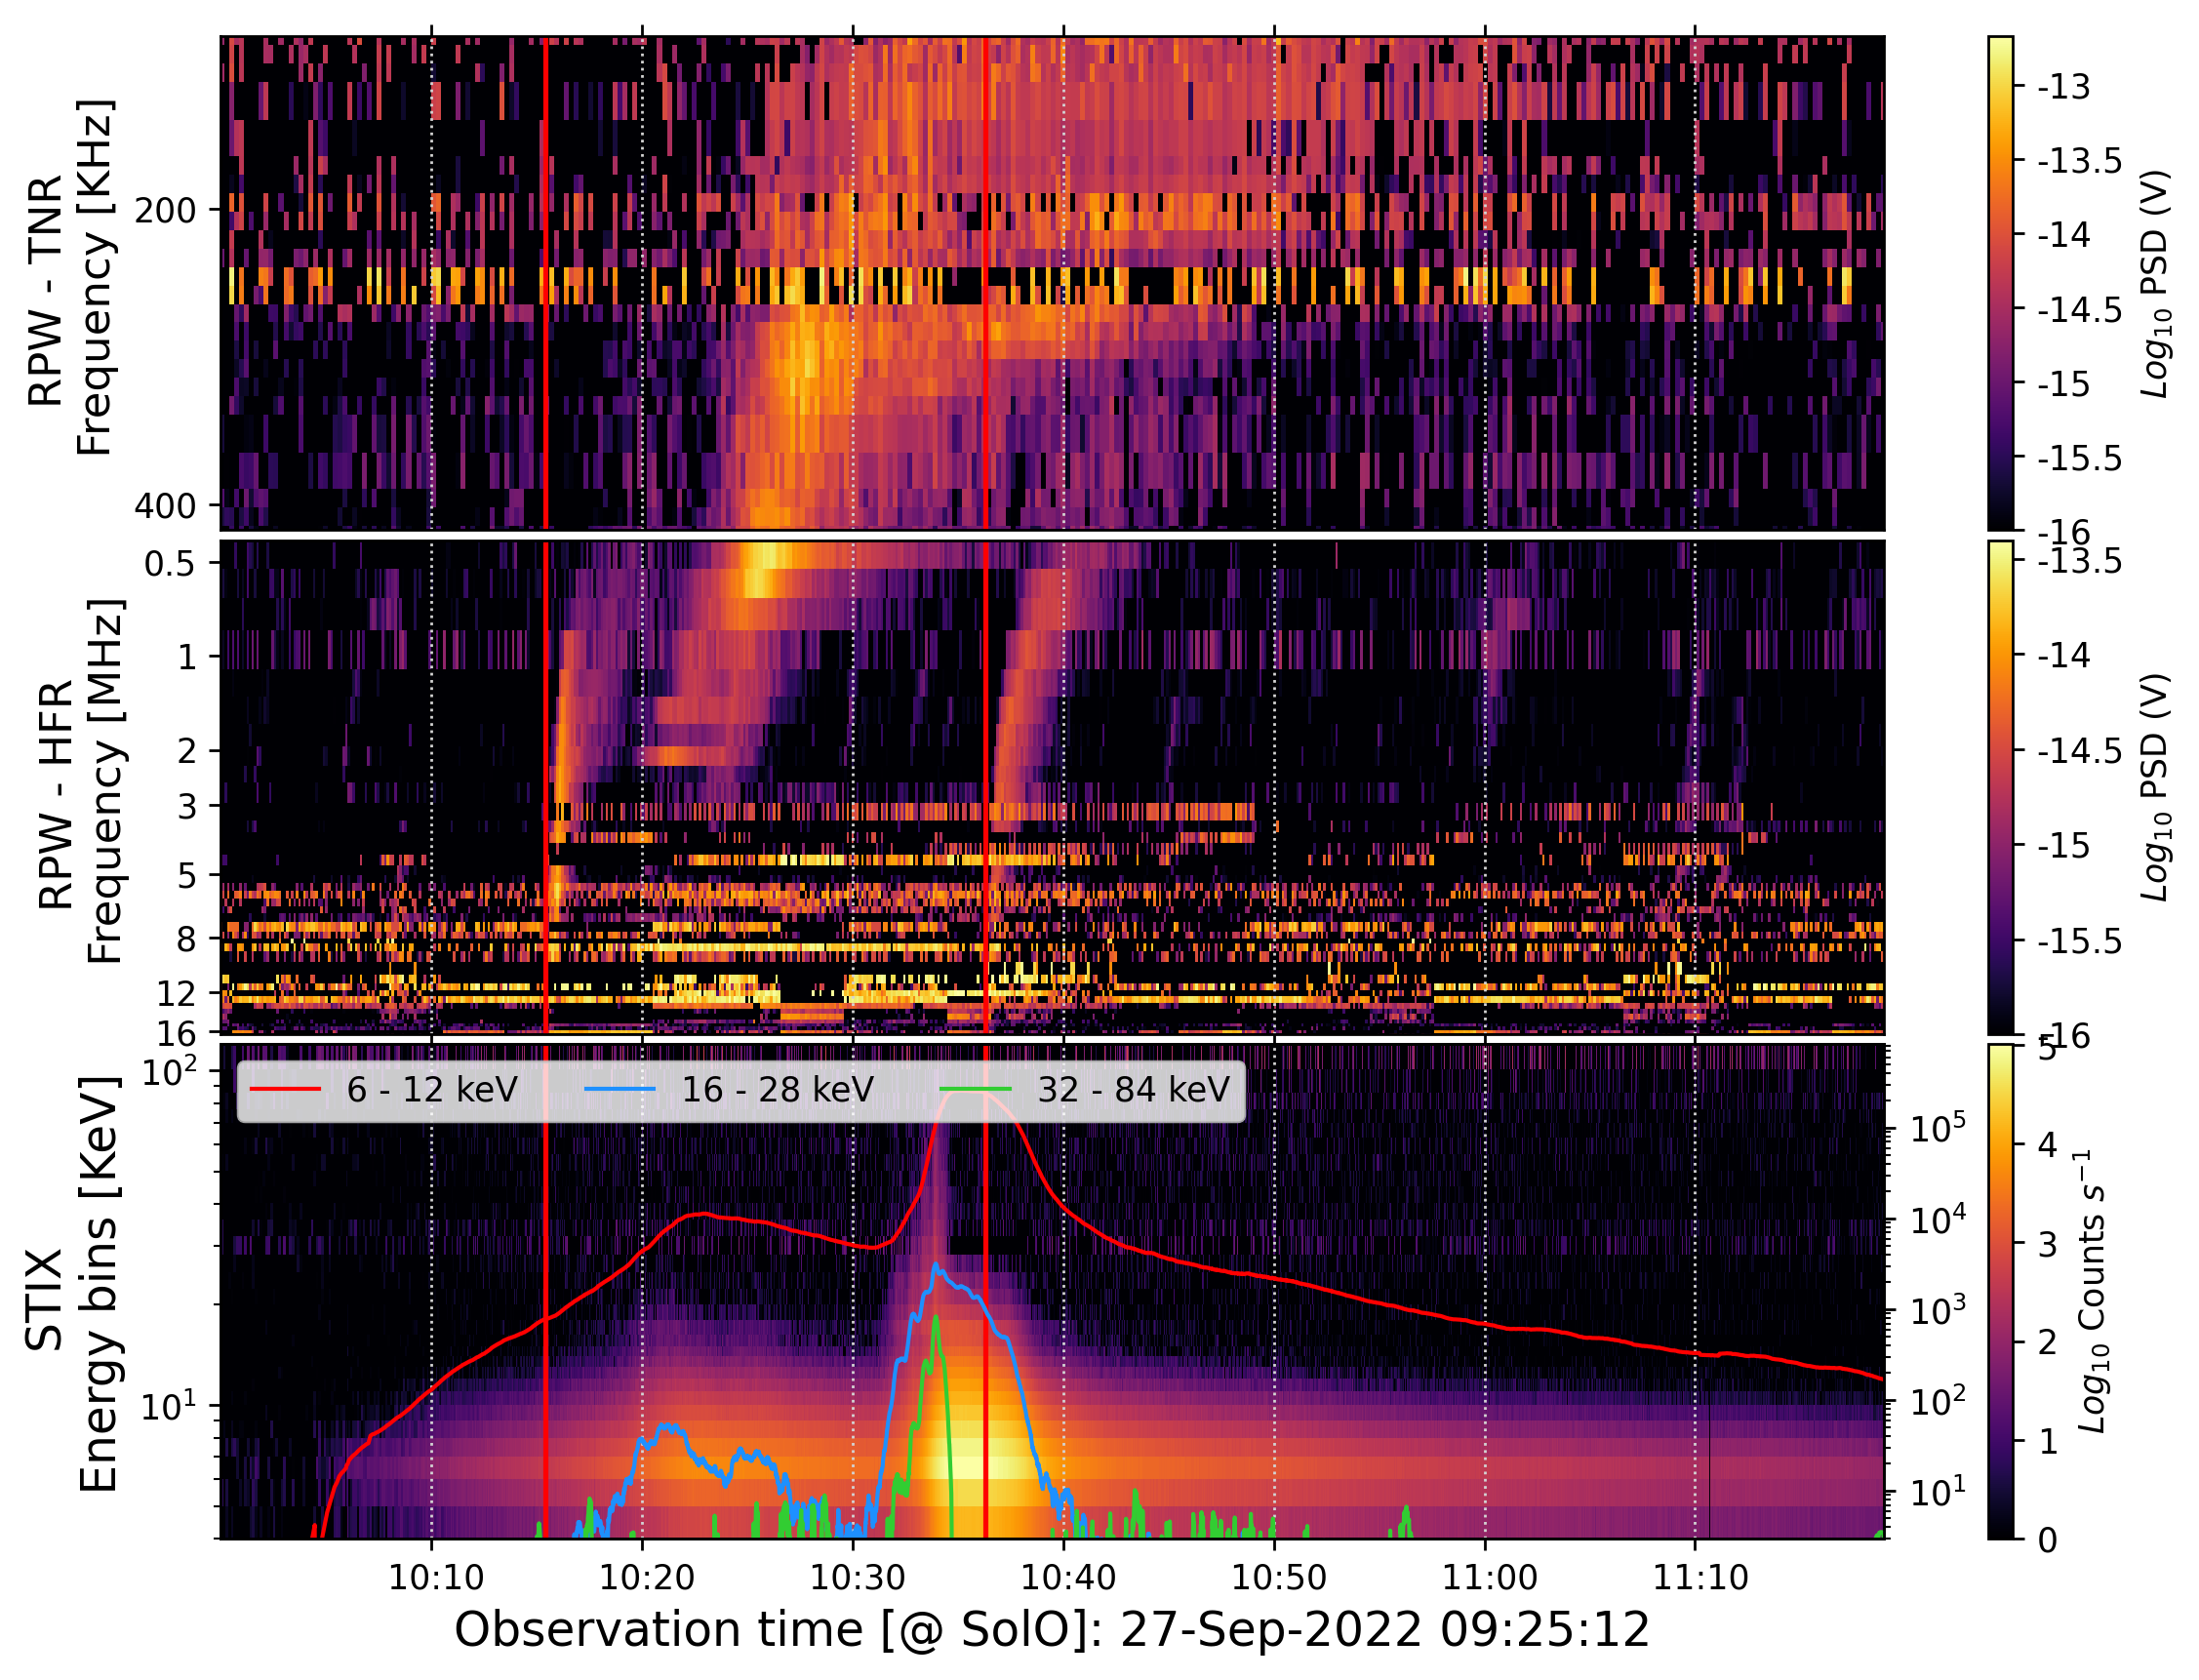

In [27]:

# use the stix_rpw_combinedQuickLook function to display RPW/STIX simultaneous observations in SOLO time

# you can define a dictionary of markers to plot (vertical lines across all spectrograms)
markerlines = {'27-Sep-2022 10:15:26':'red',
               '27-Sep-2022 10:36:18':'red'}


_=sololab.stix_rpw_combinedQuickLook(l1_cts, # L1 counts object
                                     hfr_psd, # HFR psd
                                     tnr_psd=tnr_psd, # TNR psd, optional
                                     energy_range=[4,120], # stix spectrogram energy range 
                                     frequency_range=[40,17300],# RPW freq range (kHz)
                                     energy_bins=[[6,12],[16,28],[32,90]], # energy bins to plot curves on stix (if 'mode' set to overlay or curves)
                                     frequencies=[150,300,600], # frequency channel to plot time profile curves on rpw psd  (if 'mode' set to overlay or curves)
                                     stix_cmap="Reds", # stix colormap (spectrogram)
                                     rpw_cmap="Blues",# rpw colormap (spectrogram)
                                     cmap="inferno",# general colormap ( if defined, it will be used in RPW and STIX, if not, stix_cmap and rpw_cmap will be used)
                                     date_fmt="%H:%M", # x axis date format
                                     rpw_repeated_freqs="only_hfr", # for RPW overlappinfg freqs (400 to 1000 kHz), use HFR data(only_hfr) or TNR data (only_tnr)
                                     rpw_join_xaxis=True, # ALWAYS set to true, to have nice plots
                                     #date_range=date_range,    # define a custon date_range to plot, if  not defined plot maximal common time interval in data
                                     stix_ylogscale=True, # log scale  in Y axis of stix spectrgram (ideal when having counts above 40 keV)
                                     smoothing_points=25, # number of points to smooth curves (ideally between 3 and 15, no smoothing  if Not defined or 1 )
                                     figsize=(11,8), # x,y size of fiugre
                                     mode="overlay", # 'overlay' = overlay curves on spectrograms, 'spectrogram'=only spectrograms,'curves'=only curves
                                     curve_overlay="stix", # 'stix'=only stix has curve overlays, 'rpw'=only rpw has curve overlays, 'both'=overlay on both
                                     rpw_plot_bias=True, # if curves are overlayed, it shifts the curves on Y direction to have a better visualization
                                     curve_lw=1.2, # linewidth of curves
                                     fontsize=10, # figure fontsize
                                     markers=markerlines) # set of markerlines to plort


### Bonus: Langmuir waves

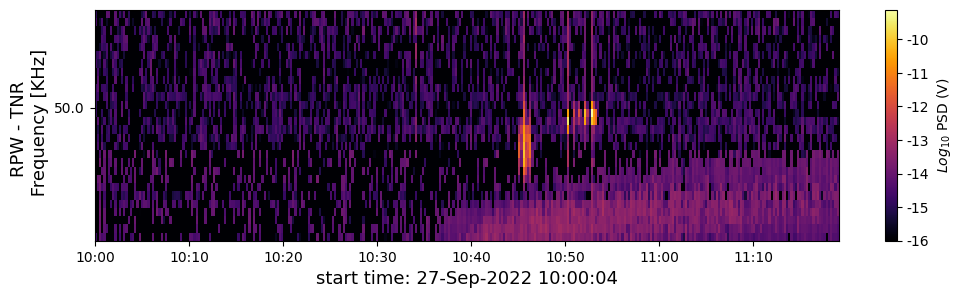

In [15]:

plt.figure(figsize=(12,3))
ax = plt.subplot(111)
sololab.rpw_plot_psd(lang_psd,ax=ax,cmap='inferno')
ax.invert_yaxis()


# Incuding EPD data

### Download data

In [16]:
epd_savepath = '../data/epd/'

# load ept sun viewing data
# using the 'epd_load' tool we can select L2 data for one whole day. Choose the day that contains the RPW/STIX data

df_protons_ept, df_electrons_ept, energies_ept =  epd_load(sensor='ept', level='l2', startdate=20220927,
            enddate=20220928, viewing='sun', path=epd_savepath, autodownload=True)

/home/dpaipa/Documents/solo_workenv/lib/python3.10/site-packages/sunpy/io/cdf.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[var_key + f'_{i}'] = col
/home/dpaipa/Documents/solo_workenv/lib/python3.10/site-packages/sunpy/io/cdf.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[var_key + f'_{i}'] = col
/home/dpaipa/Documents/solo_workenv/lib/python3.10/site-packages/sunpy/io/cdf.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/home/dpaipa/Documents/solo_workenv/lib/python3.10/site-packages/sunpy/io/cdf.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[var_key + f'_{i}'] = col
/home/dpaipa/Documents/solo_workenv/lib/python3.10/site-packages/sunpy/io/cdf.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[var_key + f'_{i}'] = col
/home/dpaipa/Documents/solo_workenv/lib/python3.10/site-packages/sunpy/io/cdf.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

/home/dpaipa/Documents/solo_workenv/lib/python3.10/site-packages/sunpy/io/cdf.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[var_key + f'_{i}'] = col
/home/dpaipa/Documents/solo_workenv/lib/python3.10/site-packages/sunpy/io/cdf.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[var_key + f'_{i}'] = col
/home/dpaipa/Documents/solo_workenv/lib/python3.10/site-packages/sunpy/io/cdf.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

STIX energy bins info:
6 - 12 keV max. cts/sec = 260976  Time: 27-Sep-2022 10:35:08
16 - 28 keV max. cts/sec = 3855  Time: 27-Sep-2022 10:33:54
32 - 84 keV max. cts/sec = 1370  Time: 27-Sep-2022 13:39:00


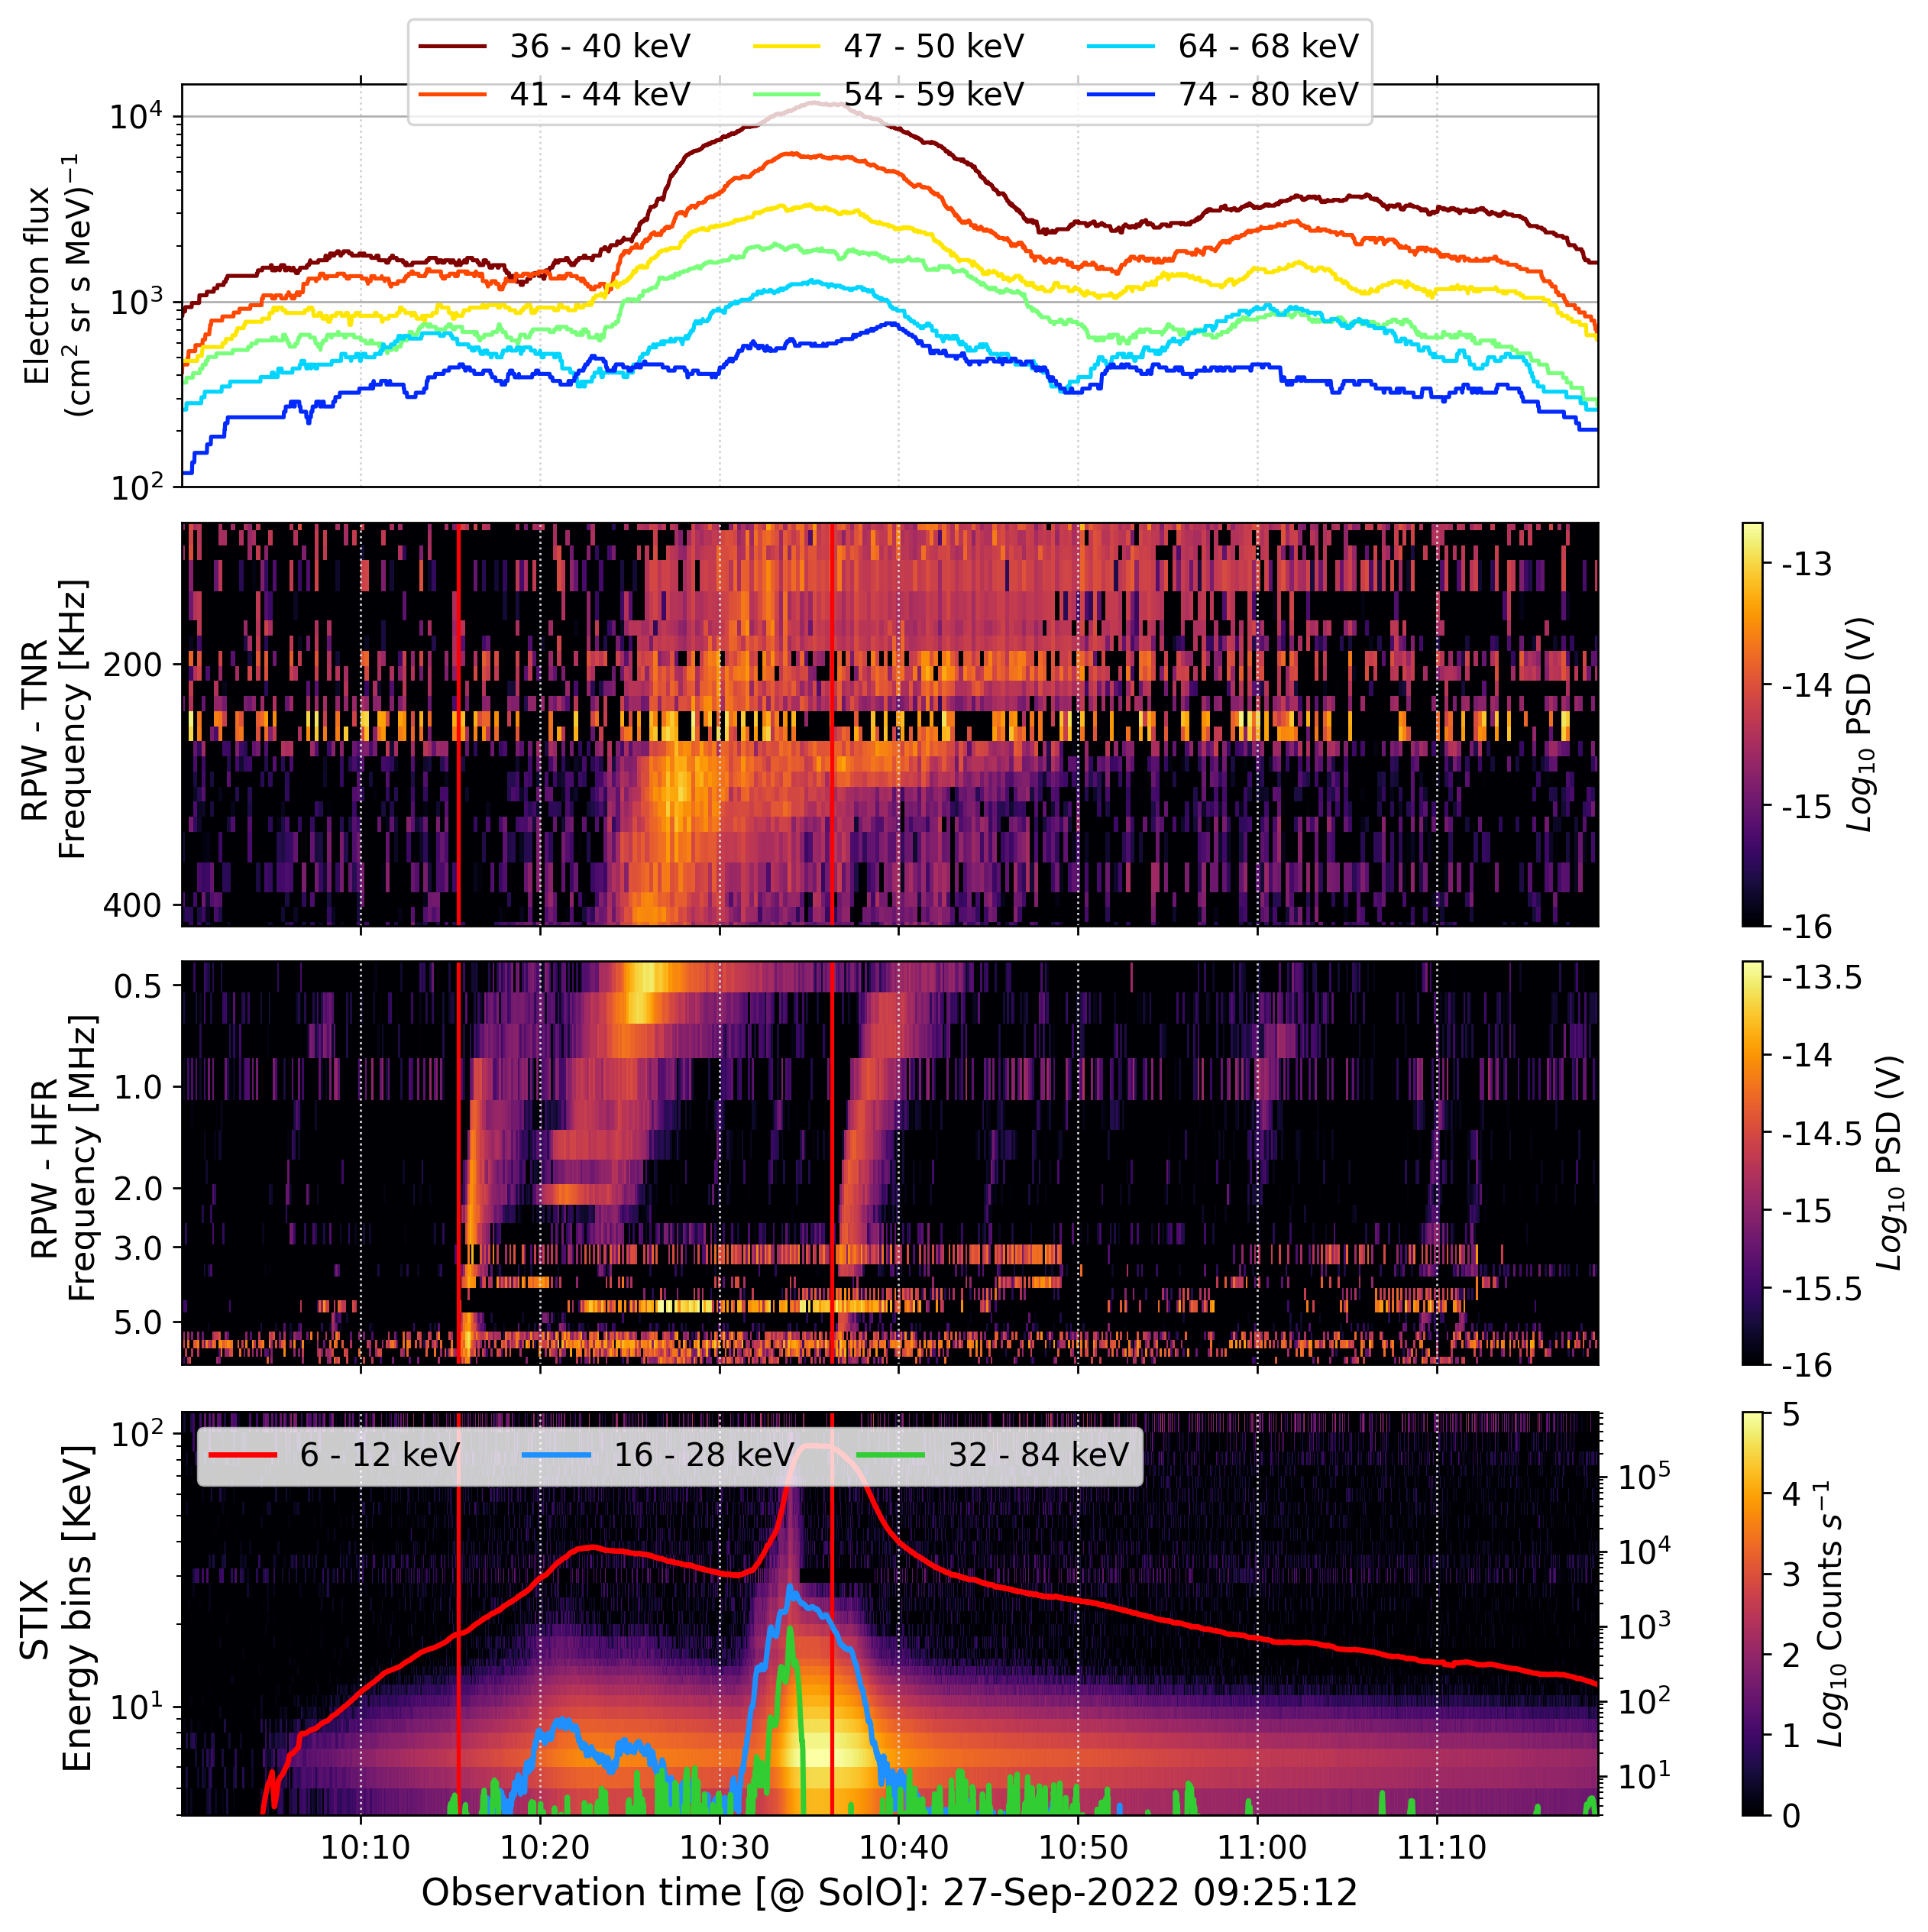

In [29]:
_=sololab.plot_stix_rpw_epd(l1_cts,
                            hfr_psd,
                            df_electrons_ept,
                            energies_ept,
                            tnr_psd=tnr_psd,
                            energy_range=[4,120],
                            frequency_range=[50,6700],
                            energy_bins=[[6,12],[16,28],[32,90]],
                            cmap="inferno",date_fmt="%H:%M",
                            rpw_repeated_freqs="only_hfr",
                            rpw_join_xaxis=True,
                            ept_channels=[2,4,6,8,10,12], # choose ept electron energy channels to plot (between 0 and 33)
                            ylogscale_stix_curves=True, 
                            #date_range=date_range,
                            stix_ylogscale=True,
                            smoothing_points=15,
                            figsize=(10,10),
                            mode="overlay",
                            curve_overlay="stix",
                            rpw_plot_bias=True,
                            curve_lw=2,
                            fontsize=12
                            ,markers=markerlines)


In [37]:

hfr_file = "../data/rpw/cdf/202110/solo_L2_rpw-hfr-surv-cdag_20211028_V04.cdf"
hfr_data = sololab.rpw_get_data(hfr_file,sensor=10)

# create the PSD object
# you can set the range of frequencies (in kHz) that are extracted and saved. 
# IMPORTANT: high frequency channels (above 5MHz) have pollution that can reach 
# up to 3 orders of magnitude above the peak values during transient events, thus
# is recommended to limit the frequencies extracted (towards high freqs) as much as possible
# to have good contrast when plotting the spectrograms
bkk = ['28-oct-2021 03:00:00','28-oct-2021 04:00:00']
hfr_psd = sololab.rpw_create_PSD(hfr_data,
                         freq_range=[0,16500],rpw_bkg_interval=bkk)



Extracting info:
  File:  solo_L2_rpw-hfr-surv-cdag_20211028_V04.cdf
  Type:  RPW-HFR L2
  sensors:  (564960,) (827520,)
  data cropped from  2021-10-28 00:01:07.392149  to  2021-10-29 00:00:46.140332
  40 Selected frequencies [kHz]:  425.0 625.0 675.0 975.0 1225.0 1475.0 1825.0 2075.0 2425.0 2675.0 3225.0 3525.0 3825.0 4125.0 4525.0 4875.0 5225.0 5475.0 5825.0 6175.0 6525.0 6875.0 7375.0 7975.0 8175.0 8575.0 9175.0 10025.0 11025.0 11375.0 12225.0 12475.0 13375.0 13725.0 14375.0 14925.0 15275.0 15625.0 16075.0 16325.0
  Creating mean bkg from  2021-10-28 03:00:00  to  2021-10-28 04:00:00 ...
  bkg done.
  Data info:
   Dt : Max = 173s  Min = 9s  Avg = 13.3s  std = 7.1s  Median:9.0s   Mode: 9s (67.8%)
  RPW PSD Done.
  Sorting PSD time axis...
  Sorting PSD frequency axis...
  PSD Sorted.


<AxesSubplot: xlabel='start time: 28-Oct-2021 00:01:07', ylabel='RPW - HFR \n Frequency [MHz]'>

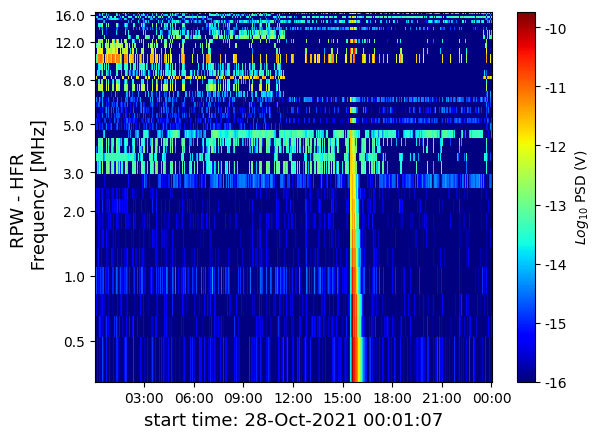

In [38]:

sololab.rpw_plot_psd(hfr_psd)

In [32]:
ii =hfr_psd["v"]<=0

In [34]:
hfr_psd["v"][ii] = 1e-16

In [39]:
hfr_psd

{'t_idx': array([   0,    1,    2, ..., 6067, 6068, 6069]),
 'freq_idx': array([  1,   5,   6,  12,  17,  22,  29,  34,  41,  46,  57,  63,  75,
         83,  90,  97, 102, 109, 116, 123, 130, 140, 152, 156, 164, 176,
        220, 242, 260, 280, 298, 305, 314, 319,  69, 193, 213, 237, 267,
        291]),
 'time': array([datetime.datetime(2021, 10, 28, 0, 1, 7, 392149),
        datetime.datetime(2021, 10, 28, 0, 1, 35, 391189),
        datetime.datetime(2021, 10, 28, 0, 1, 56, 389752), ...,
        datetime.datetime(2021, 10, 28, 23, 59, 57, 143751),
        datetime.datetime(2021, 10, 29, 0, 0, 18, 142314),
        datetime.datetime(2021, 10, 29, 0, 0, 46, 140332)], dtype=object),
 'frequency': array([  425.,   625.,   675.,   975.,  1225.,  1475.,  1825.,  2075.,
         2425.,  2675.,  3225.,  3525.,  3825.,  4125.,  4525.,  4875.,
         5225.,  5475.,  5825.,  6175.,  6525.,  6875.,  7375.,  7975.,
         8175.,  8575.,  9175., 10025., 11025., 11375., 12225., 12475.,
        1

In [42]:
hfr_psd['bkg']

array([[3.89533332e-15, 3.89533332e-15, 3.89533332e-15, ...,
        3.89533332e-15, 3.89533332e-15, 3.89533332e-15],
       [3.37830834e-15, 3.37830834e-15, 3.37830834e-15, ...,
        3.37830834e-15, 3.37830834e-15, 3.37830834e-15],
       [2.56723118e-15, 2.56723118e-15, 2.56723118e-15, ...,
        2.56723118e-15, 2.56723118e-15, 2.56723118e-15],
       ...,
       [3.22134424e-13, 3.22134424e-13, 3.22134424e-13, ...,
        3.22134424e-13, 3.22134424e-13, 3.22134424e-13],
       [2.11548415e-14, 2.11548415e-14, 2.11548415e-14, ...,
        2.11548415e-14, 2.11548415e-14, 2.11548415e-14],
       [4.14002589e-14, 4.14002589e-14, 4.14002589e-14, ...,
        4.14002589e-14, 4.14002589e-14, 4.14002589e-14]])

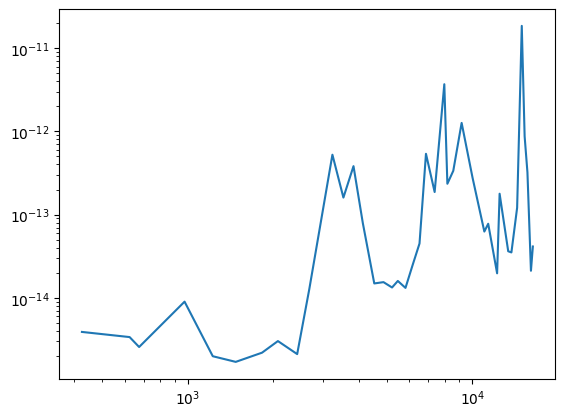

In [45]:
plt.plot(hfr_psd["frequency"],hfr_psd["bkg"][:,0])
plt.yscale('log')
plt.xscale('log')